## Validate network architecture

In [1]:
import yfinance as yf
from datetime import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns
sns.set_style('whitegrid')

import torch
import torch.nn as nn

from sklearn.preprocessing import MinMaxScaler

# project modules
import importlib
import model
from src.data_processing import create_loaders
from src.data_processing import normalize_data
from src.data_processing import split_to_sequences
from src.training import train_model
from src.training import predict
from visualization import plot_losses
from visualization import draw_prediction
from src.positional import Time2Vector
from data_generator import generate_df

# # importlib.reload(pos)
%load_ext autoreload
# %autoreload 2

: 

: 

In [5]:
print(torch.__version__)

1.11.0


### Generate test sequence

In [17]:
# generate test dataset
generated_df = generate_df()
generated_df["Adj Close"] = generated_df["views"]
data_len = len(generated_df)
print(f"Dataset size: {data_len}")
print(generated_df.head())

Dataset size: 731
   timestamp  index  amplitude    offset     views  Adj Close
0 2018-01-01      0   0.822255  0.469199 -0.246451  -0.246451
1 2018-01-02      1   0.823758  0.396360 -0.474422  -0.474422
2 2018-01-03      2   0.825261  0.334478 -0.374051  -0.374051
3 2018-01-04      3   0.826764  0.286447 -0.397195  -0.397195
4 2018-01-05      4   0.828267  0.254513 -0.362731  -0.362731


<AxesSubplot:xlabel='timestamp'>

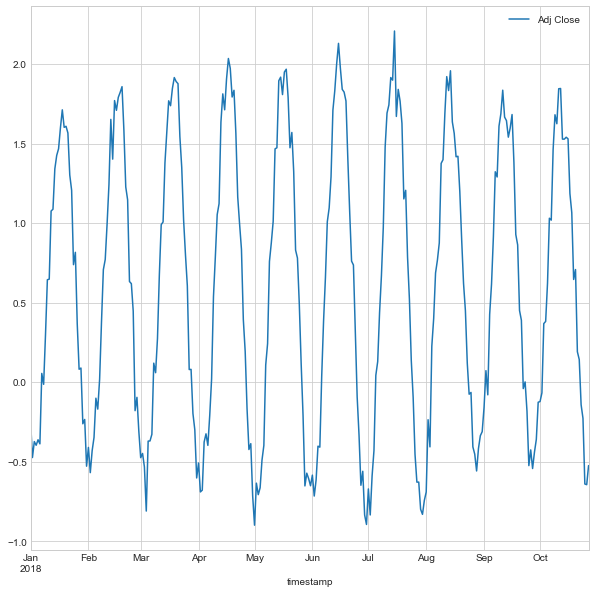

In [18]:
# draw test data sequence
generated_df[:300].plot(x="timestamp", y="Adj Close",
        kind="line", figsize=(10, 10))

In [19]:
# set generated data as a data to work with
data = generated_df
data.head()

,timestamp,index,amplitude,offset,views,Adj Close
0,2018-01-01,0,0.822255,0.469199,-0.246451,-0.246451
1,2018-01-02,1,0.823758,0.396360,-0.474422,-0.474422
2,2018-01-03,2,0.825261,0.334478,-0.374051,-0.374051
3,2018-01-04,3,0.826764,0.286447,-0.397195,-0.397195
4,2018-01-05,4,0.828267,0.254513,-0.362731,-0.362731


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  731 non-null    datetime64[ns]
 1   index      731 non-null    int64         
 2   amplitude  731 non-null    float64       
 3   offset     731 non-null    float64       
 4   views      731 non-null    float64       
 5   Adj Close  731 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 34.4 KB


In [21]:
data.describe()

,index,amplitude,offset,views,Adj Close
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,365.000000,0.971682,0.628234,0.614366,0.614366
std,211.165812,0.093972,0.277159,0.723510,0.723510
min,0.000000,0.822255,0.240169,-0.899783,-0.899783
25%,182.500000,0.889895,0.359392,0.040864,0.040864
50%,365.000000,0.962045,0.633774,0.628514,0.628514
75%,547.500000,1.052983,0.897546,1.203111,1.203111
max,730.000000,1.143922,1.021564,2.207300,2.207300


### Data split

In [22]:
# training sequence length
seq_len = 7 # in days

# validation dataset length in days
valid_len = 105 # in days

# test dataset length in days
test_len = 105 # in days

In [24]:
# Data columns
print(data.columns)
target_column = "Adj Close"
feature_columns = ["Adj Close"]

# Scalers
scalers = [
    (["Adj Close"], MinMaxScaler()),
]

Index(['timestamp', 'index', 'amplitude', 'offset', 'views', 'Adj Close'], dtype='object')


In [25]:
# Create loaders
train_loader, valid_loader, test_loader = create_loaders(data[feature_columns], target_column, scalers, valid_len, test_len)

Train data shape: (521, 1)
Valid data shape: (105, 1)
Test data shape: (105, 1)
Transform columns ['Adj Close']
Transform columns ['Adj Close']
Transform columns ['Adj Close']


### Train model

Epoch 1
Train loss: 4.712094


/Users/nin/opt/anaconda3/envs/udacity/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/nin/opt/anaconda3/envs/udacity/lib/python3.8/site-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([2, 1])) that is different to the input size (torch.Size([2])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Test loss: 0.055858
Epoch 2
Train loss: 3.167268
Test loss: 0.139230
Epoch 3
Train loss: 2.859441
Test loss: 0.163550
Epoch 4
Train loss: 3.011033
Test loss: 0.090264
Epoch 5
Train loss: 2.364986
Test loss: 0.038790
Epoch 6
Train loss: 2.505198
Test loss: 0.043958
Epoch 7
Train loss: 2.505008
Test loss: 0.187795
Epoch 8
Train loss: 2.624805
Test loss: 0.437682
Epoch 9
Train loss: 2.221286
Test loss: 0.032793
Epoch 10
Train loss: 2.497442
Test loss: 0.092528
Epoch 11
Train loss: 2.321465
Test loss: 0.026836
Epoch 12
Train loss: 2.303437
Test loss: 0.024127
Epoch 13
Train loss: 2.382516
Test loss: 0.190462
Epoch 14
Train loss: 2.231038
Test loss: 0.142166
Epoch 15
Train loss: 2.319651
Test loss: 0.034646
Epoch 16
Train loss: 2.033061
Test loss: 0.069957
Epoch 17
Train loss: 2.059686
Test loss: 0.156725
Epoch 18
Train loss: 2.118128
Test loss: 0.081613
Epoch 19
Train loss: 2.051220
Test loss: 0.060669
Epoch 20
Train loss: 1.904899
Test loss: 0.082699
Epoch 21
Train loss: 1.890136
Test los

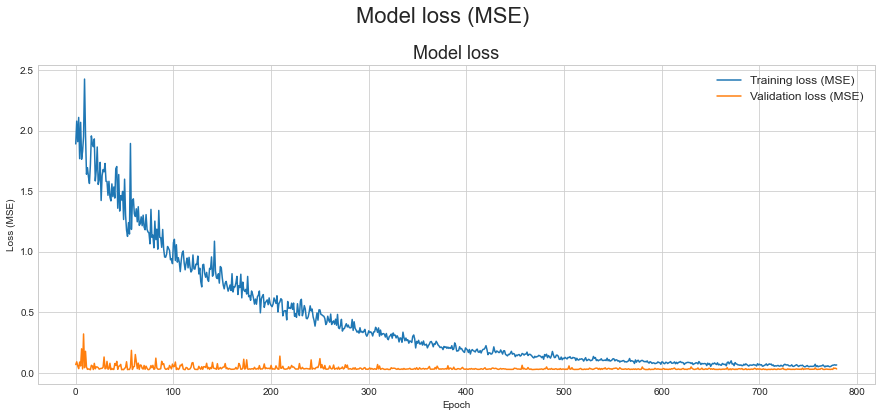

In [26]:

epochs=800
lr=0.00001

model = model.TransformerTime2Vec(feature_size=len(feature_columns), use_mask=True)
train_losses, valid_losses = train_model(model, train_loader, valid_loader, epochs, lr)
plot_losses(train_losses[20:], valid_losses[20:])

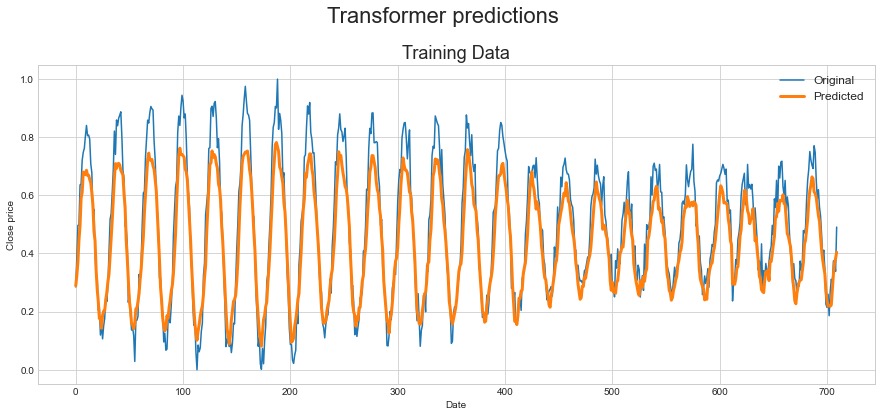

In [27]:
original, predictions = predict(model, [train_loader, valid_loader, test_loader])
draw_prediction(original, predictions)